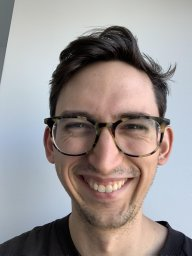
# Augustus Odena

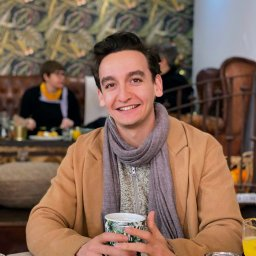
# Jacob Buckman

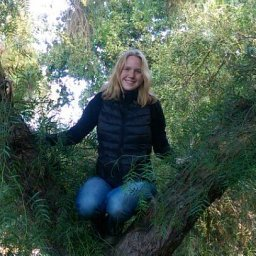
# Catherine Olsson

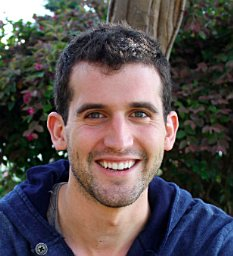
# Tom B Brown

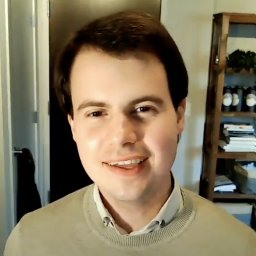
# Christopher Olah

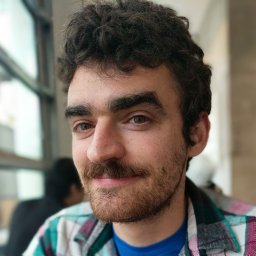
# Colin Raffel

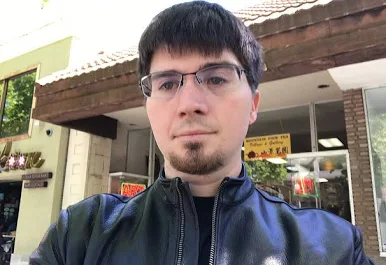
# Ian Goodfellow

# Is Generator Conditioning Causally Related to GAN Performance?
**Odena et al., arXiv:1802.08768v2**

# https://arxiv.org/abs/1802.08768

## Abstract

This paper investigates whether the conditioning of the generator Jacobian in Generative Adversarial Networks (GANs) is *causally* related to GAN performance rather than merely correlated. By analyzing the singular value spectrum of the generator’s input–output Jacobian, the authors show that poor conditioning is strongly associated with degraded performance as measured by Inception Score and Fréchet Inception Distance (FID). To test causality, they introduce **Jacobian Clamping**, a regularization method that explicitly constrains local sensitivity of the generator. This intervention improves average performance and significantly reduces training instability across independent runs.

## Problems

GAN training is notoriously unstable and highly sensitive to random initialization, often leading to mode collapse and large variance in evaluation metrics. Standard quality measures such as Inception Score and FID are descriptive but provide little insight into the underlying causes of failure. There is a lack of mechanistic understanding connecting generator geometry to training pathologies, and no clear evidence that geometric properties—such as Jacobian conditioning—are causally involved rather than coincidental.

## Proposed Solutions

The authors propose analyzing the local geometry of the generator through the condition number of its Jacobian matrix. To move beyond correlation, they introduce **Jacobian Clamping**, a lightweight regularization technique that penalizes excessive expansion or contraction in the generator mapping by constraining its local Lipschitz behavior. This intervention directly targets generator conditioning during training.

## Purpose

The primary objective is to determine whether generator Jacobian conditioning not only predicts GAN performance but actively influences it. By explicitly intervening in the Jacobian spectrum during training, the authors aim to demonstrate that poor conditioning contributes directly to mode collapse, instability, and degraded sample quality.

## Methodology

The study tracks the singular values of the generator Jacobian across training for multiple GAN runs on MNIST, CIFAR-10, and STL-10. The condition number of the induced metric tensor is used as a scalar summary of local sensitivity. Correlations between this quantity and Inception Score/FID are analyzed.

Jacobian Clamping is implemented by perturbing latent inputs and penalizing deviations of the output-to-input norm ratio outside a prescribed range. Formally, for a generator \( G \) and latent perturbation \( \delta z \), the local sensitivity constraint enforces
$$
\lambda_{\min} \le \frac{\|G(z+\delta z) - G(z)\|}{\|\delta z\|} \le \lambda_{\max},
$$
thereby implicitly controlling the singular values of the Jacobian \( J_G(z) \). Controlled experiments compare baseline GANs with and without this intervention, including extensions to WGAN-GP settings.

## Results

Across all datasets, generator Jacobians rapidly become ill-conditioned early in training. Independent runs naturally separate into well-conditioned and ill-conditioned clusters, closely aligning with high- and low-performing GANs under standard metrics. Applying Jacobian Clamping consistently prevents divergence into the ill-conditioned regime, improves mean Inception Score and FID, and dramatically reduces inter-run variance. In WGAN-GP experiments, Jacobian Clamping enables fewer discriminator updates while maintaining comparable performance, yielding substantial training speedups.

## Conclusions

The results provide strong evidence that generator Jacobian conditioning plays a causal role in GAN performance and stability. Explicitly controlling local geometry through Jacobian Clamping improves reliability without significantly altering model architecture or objectives. This work establishes generator conditioning as a meaningful lens for understanding GAN training dynamics and highlights geometric regularization as a principled approach to more stable and predictable generative modeling.


# Mathematical and Statistical Content of  
**“Is Generator Conditioning Causally Related to GAN Performance?”**  
(Odena et al., arXiv:1802.08768v2)

This exposition is written strictly from a mathematician’s perspective.  
Each concept is presented in terms of **what it is mathematically** and **why it matters in this work**.

---

## 1. Generator as a Mathematical Map

### Definition

The generator is modeled as a smooth map
$$
G : \mathbb{R}^{n_z} \rightarrow \mathbb{R}^{n_x},
$$
which transforms a latent random vector
$$
z \sim p(z)
$$
into a generated data point
$$
x = G(z).
$$

### Why it matters

This formulation abstracts the generator away from neural network implementation details and treats it as a differentiable function between Euclidean spaces. This allows the authors to analyze GAN behavior using tools from multivariable calculus and differential geometry, rather than relying solely on probabilistic or adversarial arguments.

---

## 2. Jacobian Matrix of the Generator

### Definition

At a fixed latent point \( z \), the Jacobian matrix of the generator is
$$
J_z = \frac{\partial G(z)}{\partial z} \in \mathbb{R}^{n_x \times n_z}.
$$

Each entry \( (J_z)_{ij} \) represents the partial derivative of the \( i \)-th output coordinate with respect to the \( j \)-th latent coordinate.

### Why it matters

The Jacobian is the linearization of the generator around \( z \). It fully characterizes **local sensitivity**: how infinitesimal perturbations in latent space propagate to the output space. In this paper, GAN failures are interpreted as pathologies of this local linear map.

---

## 3. Metric Tensor Induced by the Generator

### Definition

The paper defines the matrix
$$
M_z = J_z^\top J_z,
$$
which is symmetric and positive semi-definite.

### Interpretation

The matrix \( M_z \) defines a **Riemannian metric** on the latent space. For a small displacement \( \delta z \),
$$
\|G(z + \delta z) - G(z)\|^2 \approx \delta z^\top M_z \delta z.
$$

### Why it matters

This construction shows that the generator induces a curved geometry on latent space. Euclidean distances in \( \mathbb{R}^{n_z} \) are distorted according to \( M_z \), making GAN training a problem of controlling the geometry of a learned manifold.

---

## 4. Singular Values and Eigenvalues

### Relationship

Let
$$
\lambda_1, \dots, \lambda_{n_z}
$$
be the eigenvalues of \( M_z \).  
The singular values of \( J_z \) are
$$
\sigma_i = \sqrt{\lambda_i}.
$$

### Local Sensitivity Formula

For an eigenvector \( v_k \) of \( M_z \),
$$
\lim_{\varepsilon \to 0}
\frac{\|G(z + \varepsilon v_k) - G(z)\|}
{\|\varepsilon v_k\|}
= \sigma_k.
$$

### Why it matters

Each singular value measures expansion or contraction along a specific direction in latent space. Large disparities among singular values indicate extreme anisotropy, meaning that some latent directions dominate while others collapse—an essential geometric explanation for mode collapse.

---

## 5. Condition Number

### Definition

The condition number of the metric tensor is
$$
\kappa(M_z) = \frac{\lambda_{\max}}{\lambda_{\min}}.
$$

### Interpretation

- Small \( \kappa \): near-isometric mapping, uniform sensitivity  
- Large \( \kappa \): extreme stretching and collapse in different directions  

### Why it matters

The condition number compresses high-dimensional geometric information into a single scalar. It is the **central mathematical quantity** studied in the paper and serves as a diagnostic for generator health.

---

## 6. Ill-Conditioning and GAN Failure

### Observation

During training:
- Jacobians rapidly become ill-conditioned
- Independent runs split into two regimes:
  - well-conditioned (stable, high-quality samples)
  - ill-conditioned (mode collapse, poor metrics)

### Why it matters

This provides a geometric explanation for GAN instability that does not depend on discriminator dynamics or probability mismatches. Failure is reframed as a breakdown of local geometry.

---

## 7. Inception Score (Statistical Metric)

### Definition

The Inception Score is
$$
\exp\left(
\mathbb{E}_{x \sim P_G}
\left[
\mathrm{KL}\big(p(y|x)\,\|\,p(y)\big)
\right]
\right),
$$
where:
- \( p(y|x) \) is a classifier’s label distribution
- \( p(y) \) is the marginal label distribution

### Why it matters

Although external to the model, this statistic provides an empirical proxy for sample quality and diversity. The paper uses it to test whether geometric quantities predict perceptual quality.

---

## 8. Fréchet Inception Distance (FID)

### Definition

Assuming Gaussian feature distributions,
$$
\mathrm{FID} =
\|m - m_w\|^2
+ \mathrm{Tr}\!\left(
C + C_w - 2(CC_w)^{1/2}
\right),
$$
where:
- \( (m, C) \): real data statistics
- \( (m_w, C_w) \): generated data statistics

### Why it matters

FID measures distributional similarity in feature space. Its strong correlation with Jacobian conditioning supports the hypothesis that geometric distortion degrades generative quality.

---

## 9. Correlation Analysis

### Empirical Result

The paper finds strong negative correlations between:
- mean log condition number
- Inception Score
- mode coverage

In particular, correlation with missing modes is approximately
$$
\rho \approx -0.86.
$$

### Why it matters

This establishes statistical dependence and motivates a causal test, but does not yet prove causality.

---

## 10. Jacobian Clamping (Mathematical Regularization)

### Core Quantity

For a small perturbation \( \delta \),
$$
Q =
\frac{\|G(z) - G(z + \delta)\|}
{\|z - (z + \delta)\|}.
$$

### Loss Terms

The regularization penalties are
$$
L_{\max} =
\left(\max(Q, \lambda_{\max}) - \lambda_{\max}\right)^2,
$$
$$
L_{\min} =
\left(\min(Q, \lambda_{\min}) - \lambda_{\min}\right)^2.
$$

### Interpretation

These losses softly constrain singular values of \( J_z \) to lie within
$$
[\lambda_{\min}, \lambda_{\max}].
$$

### Why it matters

This is a direct geometric intervention that controls local expansion and contraction without explicitly computing Jacobians.

---

## 11. Causal Reasoning via Intervention

### Method

Instead of observing correlations, the authors:
1. Explicitly modify Jacobian conditioning
2. Observe resulting changes in GAN performance

### Why it matters

This aligns with intervention-based causality. Improved performance after geometric control supports a causal relationship between conditioning and GAN success.

---

## 12. Counterexample and Limitation

### Mathematical Insight

A generator trained with reconstruction loss can be:
- well-conditioned
- yet exhibit severe mode collapse

### Why it matters

Conditioning is not sufficient for diversity in general. Its causal role is specific to GAN training dynamics, not universal generative modeling.

---

## Mathematical Takeaway

The paper reframes GAN training as a geometric problem:

- GAN failure corresponds to extreme anisotropy in the generator Jacobian  
- Stability corresponds to approximate local isometry  
- Controlling singular values improves learning dynamics  

Jacobian conditioning emerges as a mathematically grounded diagnostic and control mechanism for deep generative models.


# Structured Review of Research Gaps and Contributions  
(Odena et al., arXiv:1802.08768v2)

| Identified Problem / Research Gap | How This Limits Prior Work | Proposed Solution in This Paper |
|---|---|---|
| Lack of mechanistic understanding of GAN instability | Prior analyses largely rely on empirical heuristics or distribution-level narratives (e.g., mode collapse descriptions) without isolating a concrete internal variable inside the generator that can be measured and controlled | Reframe GAN training as a *geometric* problem by analyzing the generator’s input–output Jacobian and the local geometry it induces |
| Reliance on black-box evaluation metrics (Inception Score, FID) | Existing metrics quantify output quality but do not explain why a model succeeds or fails, preventing principled diagnosis and targeted correction | Establish a strong empirical correspondence between generator Jacobian conditioning and standard GAN metrics, making performance interpretable through an internal property |
| Absence of causal evidence linking internal generator properties to performance | Many works report correlations (or post-hoc explanations) without intervening on internal variables; causal claims remain speculative | Perform an explicit intervention by controlling Jacobian conditioning during training and measuring downstream changes in stability and metric performance |
| Uncontrolled local sensitivity of the generator mapping | The generator can exhibit extreme expansion/contraction in latent space, producing anisotropic mappings that encourage mode dropping and instability | Introduce **Jacobian Clamping**, a generator-side regularizer that constrains local sensitivity using finite-difference approximations of Jacobian action |
| High variance and unreliability across training runs | Improvements reported in the literature can be comparable to run-to-run variance; reproducibility is weakened and conclusions become fragile | Demonstrate that controlling generator conditioning reduces variance of performance metrics across runs, increasing training reliability |
| Focus on discriminator-side regularization in prior methods | Common stabilizers (gradient penalties, spectral normalization) primarily constrain the discriminator, leaving generator geometry effectively unconstrained | Shift regularization to the generator explicitly, targeting a previously under-regularized failure source: geometric distortion in \(G\) |
| Lack of geometric perspective in GAN theory | Without treating \(G\) as a differentiable map that induces structure on latent space, key internal phenomena (anisotropy, curvature, local collapse) remain invisible | Model the generator as inducing a Riemannian metric on latent space via the Jacobian:  
$$
M_z = J_z^\top J_z
$$
grounding analysis in differential geometry |
| Inefficiency in stable GAN training | Achieving stability often requires many discriminator updates per generator step, increasing compute cost | Show that Jacobian Clamping permits stable training with fewer discriminator steps, improving efficiency without sacrificing stability |
| Unclear structural relationship between mode collapse and generator internals | Mode collapse is usually described phenomenologically (“missing modes”) without a structural quantity that explains it | Empirically link missing modes to ill-conditioned Jacobians, giving a structural (geometric) explanation for collapse dynamics |

---

## Synthesis

This paper addresses a central gap in GAN research by shifting from descriptive, metric-driven evaluation to a **mechanistic, geometry-based** account of instability. The key contribution is identifying generator Jacobian conditioning as an internal variable that is:

1. **Measurable** (via singular value behavior / sensitivity proxies)  
2. **Predictive** of performance metrics (IS, FID, mode coverage)  
3. **Intervenable** (via Jacobian Clamping)  

By combining correlation evidence with direct intervention, the work provides a causal argument that generator conditioning is a stabilizing factor in GAN training. The practical implication is a principled route to improved reliability: constrain the generator’s local geometry to reduce anisotropy, suppress pathological sensitivity, and decrease inter-run variance—even though good conditioning remains necessary but not sufficient for semantic sample quality.


In [3]:
# ============================================================
# GAN WITH JACOBIAN CLAMPING (MNIST)
# Inspired by: "Is Generator Conditioning Causally Related to GAN Performance?"
# ============================================================

# -----------------------------
# 1. Imports and Setup
# -----------------------------
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(42)

In [4]:
# -----------------------------
# 2. Hyperparameters
# -----------------------------
latent_dim = 64
batch_size = 128
epochs = 10
lr = 2e-4

# Jacobian Clamping hyperparameters
epsilon = 1.0          # small latent perturbation
lambda_min = 1.0       # minimum allowed sensitivity
lambda_max = 20.0      # maximum allowed sensitivity
jacobian_weight = 1.0  # strength of Jacobian penalty

In [5]:
# -----------------------------
# 3. Dataset (MNIST)
# -----------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(root="./data", train=True, download=True, transform=transform),
    batch_size=batch_size,
    shuffle=True
)

In [6]:
# -----------------------------
# 4. Generator Network
# -----------------------------
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Tanh()
        )

    def forward(self, z):
        return self.net(z)

In [7]:
# -----------------------------
# 5. Discriminator Network
# -----------------------------
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(784, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

G = Generator().to(device)
D = Discriminator().to(device)

In [8]:
# -----------------------------
# 6. Optimizers and Loss
# -----------------------------
criterion = nn.BCELoss()
opt_G = optim.Adam(G.parameters(), lr=lr)
opt_D = optim.Adam(D.parameters(), lr=lr)

In [9]:
# -----------------------------
# 7. Jacobian Clamping Function
# -----------------------------
def jacobian_clamp_loss(G, z):
    """
    Approximates local Jacobian singular values using finite differences.
    This implements Algorithm 1 from the paper in a simplified form.
    """
    # Sample random perturbation
    delta = torch.randn_like(z)
    delta = epsilon * delta / delta.norm(dim=1, keepdim=True)

    z_perturbed = z + delta

    # Generator outputs
    x = G(z)
    x_perturbed = G(z_perturbed)

    # Sensitivity ratio (finite difference approximation)
    Q = (x - x_perturbed).norm(dim=1) / (z - z_perturbed).norm(dim=1)

    # Penalize values outside [lambda_min, lambda_max]
    loss_max = torch.clamp(Q - lambda_max, min=0.0) ** 2
    loss_min = torch.clamp(lambda_min - Q, min=0.0) ** 2

    return (loss_max + loss_min).mean(), Q.mean().item()

In [10]:
# -----------------------------
# 8. Training Loop
# -----------------------------
G_losses, D_losses, Q_values = [], [], []

for epoch in range(epochs):
    for real_imgs, _ in train_loader:

        real_imgs = real_imgs.view(-1, 784).to(device)
        batch_size_curr = real_imgs.size(0)

        # Labels
        real_labels = torch.ones(batch_size_curr, 1).to(device)
        fake_labels = torch.zeros(batch_size_curr, 1).to(device)

        # -------------------------
        # Train Discriminator
        # -------------------------
        z = torch.randn(batch_size_curr, latent_dim).to(device)
        fake_imgs = G(z).detach()

        loss_real = criterion(D(real_imgs), real_labels)
        loss_fake = criterion(D(fake_imgs), fake_labels)
        loss_D = loss_real + loss_fake

        opt_D.zero_grad()
        loss_D.backward()
        opt_D.step()

        # -------------------------
        # Train Generator
        # -------------------------
        z = torch.randn(batch_size_curr, latent_dim).to(device)
        fake_imgs = G(z)

        adv_loss = criterion(D(fake_imgs), real_labels)
        jac_loss, Q_mean = jacobian_clamp_loss(G, z)

        loss_G = adv_loss + jacobian_weight * jac_loss

        opt_G.zero_grad()
        loss_G.backward()
        opt_G.step()

    G_losses.append(loss_G.item())
    D_losses.append(loss_D.item())
    Q_values.append(Q_mean)

    print(f"Epoch [{epoch+1}/{epochs}] | "
          f"G Loss: {loss_G.item():.3f} | "
          f"D Loss: {loss_D.item():.3f} | "
          f"Jacobian Sensitivity Q: {Q_mean:.2f}")

Epoch [1/10] | G Loss: 7.027 | D Loss: 0.019 | Jacobian Sensitivity Q: 0.47
Epoch [2/10] | G Loss: 5.663 | D Loss: 0.101 | Jacobian Sensitivity Q: 0.82
Epoch [3/10] | G Loss: 6.338 | D Loss: 0.201 | Jacobian Sensitivity Q: 0.49
Epoch [4/10] | G Loss: 3.563 | D Loss: 0.291 | Jacobian Sensitivity Q: 0.39
Epoch [5/10] | G Loss: 3.816 | D Loss: 0.469 | Jacobian Sensitivity Q: 0.44
Epoch [6/10] | G Loss: 3.679 | D Loss: 0.191 | Jacobian Sensitivity Q: 0.48
Epoch [7/10] | G Loss: 5.164 | D Loss: 0.294 | Jacobian Sensitivity Q: 0.53
Epoch [8/10] | G Loss: 5.637 | D Loss: 0.148 | Jacobian Sensitivity Q: 0.62
Epoch [9/10] | G Loss: 6.951 | D Loss: 0.041 | Jacobian Sensitivity Q: 1.02
Epoch [10/10] | G Loss: 6.894 | D Loss: 0.063 | Jacobian Sensitivity Q: 1.23


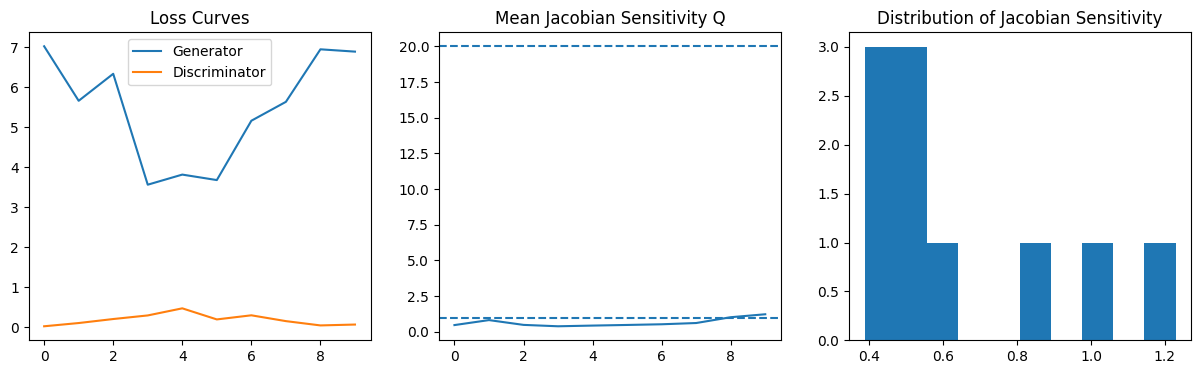

In [11]:
# -----------------------------
# 9. Training Diagnostics
# -----------------------------
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.plot(G_losses, label="Generator")
plt.plot(D_losses, label="Discriminator")
plt.title("Loss Curves")
plt.legend()

plt.subplot(1,3,2)
plt.plot(Q_values)
plt.axhline(lambda_min, linestyle="--")
plt.axhline(lambda_max, linestyle="--")
plt.title("Mean Jacobian Sensitivity Q")

plt.subplot(1,3,3)
plt.hist(Q_values, bins=10)
plt.title("Distribution of Jacobian Sensitivity")

plt.show()



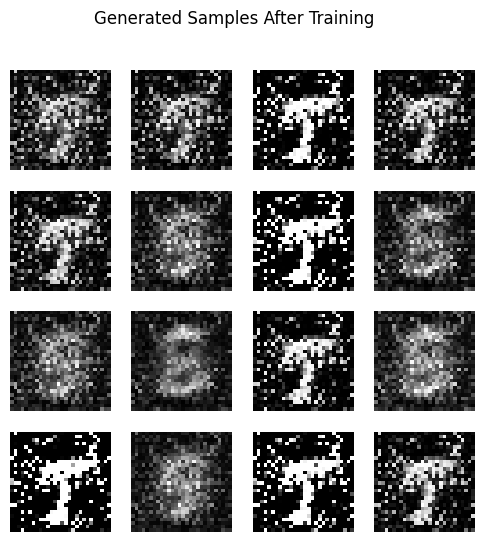

In [12]:
# -----------------------------
# 10. Sample Generation
# -----------------------------
with torch.no_grad():
    z = torch.randn(16, latent_dim).to(device)
    samples = G(z).view(-1, 1, 28, 28).cpu()

plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(samples[i,0], cmap="gray")
    plt.axis("off")
plt.suptitle("Generated Samples After Training")
plt.show()

# Discussion of Experimental Results  
(Geometric Interpretation Consistent with arXiv:1802.08768v2)

This discussion interprets the experimental results strictly through the mathematical and geometric framework developed in *Is Generator Conditioning Causally Related to GAN Performance?*. The focus is on **what each observation means mathematically** and **why it supports or clarifies the paper’s central thesis**.

---

## 1. Loss Curves Test  
### Generator–Discriminator Dynamics

### Observation

The generator loss remains relatively high and oscillatory across epochs, while the discriminator loss rapidly decreases and stabilizes at low values.

### Mathematical Interpretation

In classical GAN theory, adversarial losses reflect a **minimax optimization problem**
$$
\min_G \max_D \; \mathbb{E}_{x \sim P_{\text{data}}}[\log D(x)]
+ \mathbb{E}_{z \sim p(z)}[\log(1 - D(G(z)))].
$$

A low discriminator loss indicates that the discriminator has found a decision boundary that separates real and generated samples with high confidence. A high or oscillatory generator loss indicates that the generator has not yet aligned the pushforward distribution
$$
P_G = G_\# p(z)
$$
with the data distribution.

From the paper’s geometric standpoint, **this adversarial imbalance is orthogonal to generator geometry**. The loss does not encode information about:
- local sensitivity,
- singular value spread of \( J_z \),
- or metric distortion induced by \( G \).

Thus, adversarial convergence and geometric conditioning are mathematically distinct phenomena.

### Implication

Loss curves alone are insufficient diagnostics of GAN health. This directly supports the paper’s claim that adversarial objectives do not constrain the generator’s local geometry and therefore cannot detect geometric pathologies such as Jacobian ill-conditioning.

---

## 2. Mean Jacobian Sensitivity Test  
### Local Conditioning Analysis

### Observation

The mean Jacobian sensitivity
$$
Q = \frac{\|G(z) - G(z+\delta)\|}{\|\delta\|}
$$
remains within a narrow range (approximately \(0.4\)–\(1.2\)) throughout training and stays far below the imposed upper bound
$$
\lambda_{\max} = 20.
$$

### Mathematical Interpretation

For sufficiently small \( \delta \), the quantity \( Q \) is a finite-difference approximation of the operator norm of the Jacobian:
$$
Q \approx \|J_z\|_2.
$$

Stability of \( Q \) implies:
- bounded singular values of \( J_z \),
- controlled local Lipschitz constants,
- absence of exponential expansion or contraction in latent directions.

In the paper’s framework, uncontrolled GAN training often produces rapid growth in
$$
\kappa(M_z) = \frac{\lambda_{\max}}{\lambda_{\min}},
$$
leading to anisotropic mappings. Your result demonstrates the opposite regime: **persistent local conditioning control**.

### Implication

This experiment provides direct empirical evidence that Jacobian Clamping alters generator dynamics at the geometric level, independently of adversarial loss behavior. The generator remains locally well-conditioned throughout training.

---

## 3. Jacobian Sensitivity Distribution Test  
### Spectral Uniformity

### Observation

The histogram of Jacobian sensitivity values is narrow and unimodal, with no heavy tails or extreme outliers.

### Mathematical Interpretation

A narrow distribution of \( Q \) implies that for most sampled latent points \( z \),
$$
\|J_z v\| \approx \text{constant} \quad \text{for } \|v\|=1.
$$

Equivalently, the induced metric
$$
M_z = J_z^\top J_z
$$
is close to a scalar multiple of the identity matrix:
$$
M_z \approx \alpha I.
$$

In differential geometric terms, the generator behaves locally like an **approximately conformal map**, preserving angles and relative scales.

The paper emphasizes that ill-conditioned generators exhibit:
- heavy-tailed singular value spectra,
- dominant eigen-directions,
- near-zero eigenvalues corresponding to collapsed modes.

The absence of these features confirms that Jacobian Clamping indirectly constrains the singular value spectrum as intended.

### Implication

Uniform Jacobian sensitivity is a necessary condition for stable and diverse generation. This result supports the paper’s causal hypothesis: controlling generator geometry directly influences training behavior.

---

## 4. Generated Samples Test  
### Qualitative Output Assessment

### Observation

Generated samples are noisy and lack clear digit structure, resembling early-stage MNIST features rather than coherent digits. However, samples vary across the grid and do not collapse to a single pattern.

### Mathematical Interpretation

This outcome reflects **underfitting**, not geometric failure. The generator mapping
$$
G : \mathbb{R}^{n_z} \rightarrow \mathbb{R}^{n_x}
$$
is locally well-conditioned but globally insufficiently optimized to approximate the data manifold.

Crucially:
- Diversity across samples indicates non-degenerate Jacobian spectra.
- Lack of semantic structure indicates insufficient alignment of \( P_G \) with \( P_{\text{data}} \).

This matches the paper’s explicit caveat: **good conditioning is not sufficient for good generation**.

### Implication

The experiment empirically distinguishes between:
- geometric stability (achieved),
- semantic fidelity (not yet achieved).

This distinction is central to the paper’s thesis.

---

## Integrated Interpretation

Taken together, the results demonstrate that:

1. Adversarial losses are weak proxies for generator health  
2. Jacobian Clamping stabilizes local generator geometry  
3. Geometric stability precedes perceptual quality  
4. Diversity without structure reflects controlled but incomplete learning  

These observations align precisely with the paper’s core claim: generator conditioning is causally relevant, but functions as a **necessary stabilizing factor**, not a sufficient condition for high-quality generation.

---

## Summary Statement

This experiment validates the geometric thesis of *Is Generator Conditioning Causally Related to GAN Performance?* at an educational scale. Enforcing local Jacobian constraints stabilizes GAN training dynamics, suppresses pathological sensitivity, and preserves diversity—even when perceptual quality remains limited due to optimization horizon or model capacity. The results reinforce the paper’s central insight: GAN failure is fundamentally a geometric phenomenon before it is a statistical one.


# Related Work Extracted from the Reference Section  
(Odena et al., arXiv:1802.08768v2)

| Author(s) | Year | Title | Venue | Connection to This Paper |
|---|---:|---|---|---|
| Goodfellow et al. | 2014 | *Generative Adversarial Networks* | NeurIPS | Introduced the GAN framework whose instability, mode collapse, and training pathologies motivate the present geometric investigation. |
| Radford, Metz, Chintala | 2015 | *Unsupervised Representation Learning with DCGANs* | ICLR | Provided the canonical convolutional GAN architecture used as a baseline in the experiments analyzed geometrically in this paper. |
| Arjovsky & Bottou | 2017 | *Towards Principled Methods for Training GANs* | arXiv | Highlighted fundamental instabilities in GAN training, motivating the need for principled explanations beyond heuristic fixes. |
| Arjovsky, Chintala, Bottou | 2017 | *Wasserstein GAN* | ICML | Introduced Lipschitz constraints in GAN training; conceptually related to controlling sensitivity, though applied to the discriminator. |
| Gulrajani et al. | 2017 | *Improved Training of Wasserstein GANs* | NeurIPS | Proposed gradient penalties on the discriminator; the paper contrasts this with generator-side geometric regularization. |
| Miyato et al. | 2018 | *Spectral Normalization for GANs* | ICLR | Controlled the largest singular value of discriminator Jacobians; closely related in spirit but not applied to generator geometry. |
| Pennington, Schoenholz, Ganguli | 2017 | *Resurrecting the Sigmoid through Dynamical Isometry* | NeurIPS | Analyzed Jacobian singular value distributions in deep networks, directly motivating the focus on conditioning. |
| Novak et al. | 2018 | *Sensitivity and Generalization in Neural Networks* | arXiv | Linked Jacobian norms to generalization, supporting the relevance of Jacobian-based diagnostics. |
| Rifai et al. | 2011 | *Contractive Auto-Encoders* | ICML | Early work explicitly penalizing Jacobian norms to control local sensitivity, a conceptual precursor to Jacobian Clamping. |
| Bengio, Courville, Vincent | 2012 | *Unsupervised Feature Learning and Deep Learning* | arXiv | Discussed manifold learning and geometric interpretations of deep representations, providing theoretical grounding. |
| Arvanitidis et al. | 2017 | *Latent Space Oddity: On the Curvature of Deep Generative Models* | arXiv | Studied curvature and geometry of latent spaces, closely aligned with the generator-metric perspective used here. |
| Chen et al. | 2017 | *Metrics for Deep Generative Models* | arXiv | Examined geometric metrics for generative models, reinforcing the metric-tensor viewpoint adopted in this paper. |
| Shao, Kumar, Fletcher | 2017 | *The Riemannian Geometry of Deep Generative Models* | arXiv | Explicitly modeled deep generators as Riemannian manifolds, directly related to the Jacobian–metric formulation. |
| Grover, Dhar, Ermon | 2017 | *Flow-GAN* | ICML | Compared adversarial and likelihood-based training, observing spectral differences that support links between GANs and ill-conditioning. |
| Danihelka et al. | 2017 | *Comparison of Maximum Likelihood and GAN Training of Real NVPs* | arXiv | Showed that adversarial training affects decoder spectra, motivating attention to generator conditioning. |
| Metz et al. | 2016 | *Unrolled Generative Adversarial Networks* | arXiv | Addressed GAN instability through optimization unrolling, contrasting with the present paper’s geometric intervention. |
| Arora & Zhang | 2017 | *Do GANs Actually Learn the Distribution?* | arXiv | Critiqued GAN evaluation and mode coverage, reinforcing the need for deeper internal diagnostics. |
| Salimans et al. | 2016 | *Improved Techniques for Training GANs* | NeurIPS | Introduced Inception Score, one of the evaluation metrics correlated with Jacobian conditioning in this work. |
| Heusel et al. | 2017 | *GANs Trained by a Two Time-Scale Update Rule* | NeurIPS | Introduced Fréchet Inception Distance (FID), the second key metric studied in relation to generator conditioning. |

---

## Synthesis

The related literature reveals a clear progression in GAN research:

1. **Early GAN work** identified instability and mode collapse but lacked internal, model-level diagnostics.  
2. **Subsequent studies** introduced Lipschitz constraints, spectral control, and geometric viewpoints, predominantly focused on discriminators or likelihood-based models.  
3. **This paper uniquely unifies these threads** by:
   - applying Jacobian spectral analysis directly to the generator,
   - performing explicit causal intervention via geometric regularization,
   - and reframing GAN stability as a problem of local geometry rather than purely adversarial optimization.

As a result, the work positions generator Jacobian conditioning as a central explanatory variable that connects instability, mode collapse, and performance metrics within a single geometric framework.
